# Child Marriage Factors in Indonesia 2012-2013

__Created by: Zoraidha Aulia__

## Read Data

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
PATH='susenas12/sn12_ki.csv'

In [55]:
# read data function
def read_data(file_directory):
    '''
        file directory: string
        csv file location
    '''
    data = pd.read_csv(file_directory).copy()
    return data

In [56]:
sus12_ki = read_data(PATH)

In [57]:
sus12_ki

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,3.434643e+05,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,10,2,2,2,37,2,...,0.0,0.0,3.0,NaN,1.0,NaN,NaN,9471,1.348310e+06,6.000000
1114441,947122001103810,94,71,2,10,3,3,1,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114442,947122001103810,94,71,2,10,4,3,2,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114443,947122001103810,94,71,2,10,5,7,2,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000


Pada data susenas terdapat *weighting* untuk menentukan bagaimana data per individu/rumah tangga merepresentasikan data populasi yang relevan, maka total dari seluruh bobot individu (__weind__) akan kurang lebih sama dengan jumlah populasi Indonesia saat itu. Namun perlu diperhatikan untuk tidak mengasumsikan bahwa data ini memiliki keakuratan yang sama dengan hasil Sensus Penduduk (jumlah penduduk per tahun diekstrapolasi dari hasil Sensus dan Supas).

In [58]:
total_pop=sus12_ki['WEIND'].sum()
print('{:,.0f}'.format(total_pop))

245,138,422


## Select Relevant Variables

Susenas merupakan dataset berukuran besar dan biasanya memiliki variabel lebih banyak dari yang kita perlukan. Sehingga untuk menentukan relevan variabel pada data susenas, paling mudah dilakukan dengan melihat kembali kuesioner survey dengan mempertimbangkan tujuan penelitian. Pada kasus faktor pernikahan dini tahun 2012, berikut relevan variabel susenas 2012 yang akan digunakan:

1. __URUT__: Identifier rumah tangga
2. __NART__: Nomor urut individu dalam rumah tangga
3. __B1R1__: Kode provinsi
4. __B1R2__: Kode kabupaten/kota
5. __B1R5__: Klasifikasi desa/kelurahan (status daerah perkotaan/pedesaan)
6. __B4R5/umur__: Umur (tahun)
7. __B4R3/HB__: Hubungan dengan kepala rumah tangga
8. __B4R4/JK__: Jenis kelamin
9. __B4R6/KWN__: Status perkawinan
10. __B5R17__: Ijazah/STTB tertinggi yang dimiliki
11. __B5R32__: Umur pada saat perkawinan pertama
12. __B5R33__: Jumlah tahun dalam ikatan perkawinan
13. __B5R18A__: Mengikuti pendidikan dalam 3 bulan terakhir
14. __B5R19A__: Dapat membaca dan menulis Huruf Latin
15. __B5R19B__: Dapat membaca dan menulis Huruf Arab
16. __B5R19C__: Dapat membaca dan menulis Huruf Lainnya
17. __B5R20__: Apakah pernah mengakses internet dalam 3 bulan terakhir?
18. __EXP_CAP__: Pengeluaran per kapita
19. __WEIND__: Weighting

In [59]:
kolom=['URUT', 'NART','B1R1', 'B1R2',
        'B1R5', 'UMUR', 'HB', 'JK', 'KWN',
        'B5R17', 'B5R32', 'B5R33', 'B5R18A',
        'B5R19A', 'B5R19B', 'B5R19C', 'B5R20',
        'EXP_CAP', 'WEIND']

In [60]:
def select_columns(dataset,list_columns):
    data = dataset[list_columns].copy()
    return data

In [61]:
sus12_ki=select_columns(sus12_ki,kolom)
sus12_ki

,URUT,NART,B1R1,B1R2,B1R5,UMUR,HB,JK,KWN,B5R17,B5R32,B5R33,B5R18A,B5R19A,B5R19B,B5R19C,B5R20,EXP_CAP,WEIND
0,110112500101601,1,11,1,1,41,1,1,2,8.0,NaN,NaN,2.0,1.0,1.0,2.0,2.0,3.434643e+05,45.876255
1,110112500101601,2,11,1,1,30,2,2,2,8.0,23.0,7.0,2.0,1.0,1.0,2.0,2.0,3.434643e+05,45.876255
2,110112500101601,3,11,1,1,5,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,3.434643e+05,45.876255
3,110112500101601,4,11,1,1,0,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255
4,110112500101602,1,11,1,1,35,1,1,2,5.0,NaN,NaN,2.0,1.0,1.0,2.0,2.0,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,2,94,71,2,37,2,2,2,8.0,25.0,12.0,1.0,1.0,2.0,1.0,1.0,1.348310e+06,6.000000
1114441,947122001103810,3,94,71,2,10,3,1,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000
1114442,947122001103810,4,94,71,2,9,3,2,1,1.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000
1114443,947122001103810,5,94,71,2,46,7,2,1,5.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.348310e+06,6.000000


In [34]:
# check dataframe's size
print("number of columns: %i" %sus12_ki.shape[1])
print("number of rows: %i" %sus12_ki.shape[0])

number of columns: 19
number of rows: 1114445


In [62]:
ubah_kolom={'URUT':'identifier_rt',
        'NART': 'individu',
        'B1R1': 'provinsi',
        'B1R2': 'kab_kota',
        'B1R5': 'desa_kota',
        'UMUR': 'umur',
        'HB': 'hubkel',
        'JK': 'jenis_kelamin',
        'KWN': 'status_perkawinan',
        'B5R17': 'ijazah',
        'B5R32': 'umur_kawin',
        'B5R33': 'jml_tahun_kawin',
        'B5R18A': 'pend_3bulan',
        'B5R19A': 'bacatulis_Latin',
        'B5R19B': 'bacatulis_Arab',
        'B5R19C': 'bacatulis_Lainnya',
        'B5R20': 'internet',
        'EXP_CAP': 'exp_cap',
        'WEIND': 'weight'}

In [63]:
def change_columns(dataset,dict_column):
    data = dataset.rename(columns=dict_column).copy()
    return data

In [64]:
sus12_ki=change_columns(sus12_ki,ubah_kolom)

In [65]:
sus12_ki.head(10).T

,0,1,2,3,4,5,6,7,8,9
identifier_rt,1.101125e+14,1.101125e+14,1.101125e+14,1.101125e+14,1.101125e+14,1.101125e+14,1.101125e+14,1.101125e+14,1.101125e+14,1.101125e+14
individu,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00
provinsi,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
kab_kota,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
desa_kota,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
umur,4.100000e+01,3.000000e+01,5.000000e+00,0.000000e+00,3.500000e+01,3.300000e+01,9.000000e+00,5.000000e+00,6.000000e+01,4.600000e+01
hubkel,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00
jenis_kelamin,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
status_perkawinan,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
ijazah,8.000000e+00,8.000000e+00,1.000000e+00,NaN,5.000000e+00,2.000000e+00,1.000000e+00,NaN,1.400000e+01,1.400000e+01


### Cek kekosongan data

In [66]:
sus12_ki.isnull().sum()

identifier_rt             0
individu                  0
provinsi                  0
kab_kota                  0
desa_kota                 0
umur                      0
hubkel                    0
jenis_kelamin             0
status_perkawinan         0
ijazah               190644
umur_kawin           796654
jml_tahun_kawin      796654
pend_3bulan          190644
bacatulis_Latin      102718
bacatulis_Arab       102718
bacatulis_Lainnya    102718
internet             102718
exp_cap                   0
weight                    0
dtype: int64

Terlihat ada beberapa kolom yang memiliki null values, yaitu `ijazah`, `umur_kawin`, `pend_3bulan`, `bacatulis_Latin`, `bacatulis_Arab`, `bacatulis_Lainnya` dan `internet` namun saat ini belum terlalu krusial untuk analisa, jadi bisa dibiarkan null value-nya.

## Sanity Check

Sebelum kita mengecek lebih lanjut variabel yang kita miliki, kita perlu menyelidiki apakah data yang kita gunakan memiliki distribusi yang bersifat "well-behaved" (tidak terdapat pencilan/outlier ataupun distribusi yang janggal). Salah satu cara sederhana untuk mengecek data adalah dengan (1) melihat statistik deskriptif data numerik dan (2) . Umumnya, kita ingin melihat kejanggalan pada data-data yang bersifat continuous, karena data-data survey yang bersifat categorical umumnya hanya memiliki beberapa pilihan yang sudah ditentukan sebelumnya.

kita akan mengecek descriptive statistics untuk seluruh data dan melakukan pengecekan grafis dalam bentuk histogram pada data pengeluaran per kapita (yang kita transformasikan menjadi bentuk natural log) dan umur penduduk

In [40]:
# Descriptive Statistics
sus12_ki.describe()

,identifier_rt,individu,provinsi,kab_kota,desa_kota,umur,hubkel,jenis_kelamin,status_perkawinan,ijazah,umur_kawin,jml_tahun_kawin,pend_3bulan,bacatulis_Latin,bacatulis_Arab,bacatulis_Lainnya,internet,exp_cap,weight
count,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,923801.000000,317791.000000,317791.000000,923801.000000,1.011727e+06,1.011727e+06,1.011727e+06,1.011727e+06,1.114445e+06,1.114445e+06
mean,4.250205e+14,2.836262e+00,4.228051e+01,2.197639e+01,1.571149e+00,2.924639e+01,2.583223e+00,1.498904e+00,1.642251e+00,4.203683,20.140665,21.045036,1.697986,1.097785e+00,1.627247e+00,1.949309e+00,1.877406e+00,6.414489e+05,2.199646e+02
std,2.471679e+14,1.703301e+00,2.474286e+01,2.653410e+01,4.949122e-01,1.997500e+01,1.413839e+00,4.999990e-01,7.380006e-01,3.705277,4.268769,14.030970,0.459132,2.970242e-01,4.835373e-01,2.193651e-01,3.279711e-01,7.558085e+05,2.081108e+02
min,1.101125e+14,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.707492e+04,1.000000e+00
25%,1.805125e+14,1.000000e+00,1.800000e+01,4.000000e+00,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,17.000000,10.000000,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.033944e+05,8.018752e+01
50%,3.507220e+14,3.000000e+00,3.500000e+01,9.000000e+00,2.000000e+00,2.700000e+01,3.000000e+00,1.000000e+00,2.000000e+00,2.000000,20.000000,19.000000,2.000000,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.572752e+05,1.457933e+02
75%,6.311220e+14,4.000000e+00,6.300000e+01,2.400000e+01,2.000000e+00,4.400000e+01,3.000000e+00,2.000000e+00,2.000000e+00,8.000000,22.000000,30.000000,2.000000,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.398477e+05,2.941666e+02
max,9.471220e+14,3.000000e+01,9.400000e+01,7.900000e+01,2.000000e+00,9.800000e+01,9.000000e+00,2.000000e+00,4.000000e+00,15.000000,67.000000,86.000000,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.529981e+07,4.941000e+03


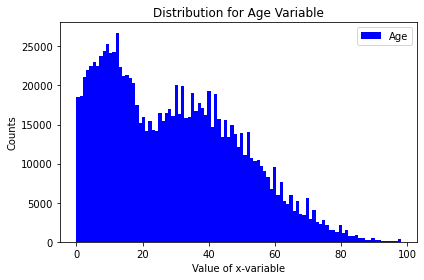

In [44]:
# Histogram for Age Variable
plot_umur = sus12_ki['umur']

plot_umur.plot.hist(grid=False, bins=99, rwidth=1,color='blue',label='Age')
plt.title('Distribution for Age Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

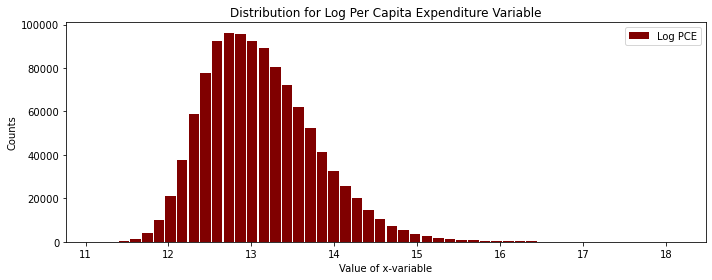

In [46]:
# Histogram for Log Expenditure per Capita Variable

sus12_ki=sus12_ki.assign(log_exp_cap=np.log(sus12_ki['exp_cap']))
plot_exp = sus12_ki['log_exp_cap']

plot_exp.plot.hist(grid=False, bins=50, rwidth=0.9,color='maroon',label='Log PCE')
plt.title('Distribution for Log Per Capita Expenditure Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

Kita bisa melihat bahwa secara umum, tidak terdapat pola yang aneh pada statistik deskriptif maupun histogram. Dengan demikian, kita bisa melanjutkan proses pembersihan data.